In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score
import math

In [2]:
model_name = ["resnet50", "mobile_net_v3_large", "efficient_net_b3"]
num_epochs = "100"
lr_start = "0.01"
lr_end = "0.001"
batch_size = "32"

In [3]:
model_params = {}

In [4]:
def get_metrics(models, dataset_name, num_epochs, batch_size,
                lr_start, lr_end):
    val_acc = {}
    val_loss = {}
    val_true = {}
    val_pred = {}

    train_acc = {}
    train_loss = {}
    train_true = {}
    train_pred = {}
    
    
    for model_name in models:
        
        with open(f'../models/val_history_augmented_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
            val_history = pickle.load(handle)

        with open(f'../models/train_history_augmented_{model_name}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
            train_history = pickle.load(handle)
        
        try:
            val_acc[model_name] = [i.item() for i in val_history['acc']]
        except:
            val_acc[model_name] = val_history['acc']
        val_loss[model_name] = val_history['loss']
        val_pred[model_name] = val_history['outputs']
        val_true[model_name] = val_history['targets']

        train_acc[model_name] = train_history['acc']
        train_loss[model_name] = train_history['loss']
        train_pred[model_name] = train_history['outputs']
        train_true[model_name] = train_history['targets']
        
    
    
    return {'train_acc': train_acc, 'train_loss': train_loss, 'train_pred': train_pred, 'train_true': train_true,
                                 'val_acc': val_acc, 'val_loss': val_loss, 'val_pred': val_pred, 'val_true': val_true}

In [5]:
dataset_name = "ads"
model_params[dataset_name] = get_metrics(model_name, dataset_name, num_epochs, batch_size, lr_start, lr_end)
model_params[dataset_name]['train_acc'].keys()

dict_keys(['resnet50', 'mobile_net_v3_large', 'efficient_net_b3'])

In [24]:
model_params['ads']['val_loss']['resnet50'].index(min(model_params['ads']['val_loss']['resnet50']))

0

In [28]:
model_params['ads']['val_loss']['mobile_net_v3_large'].index(min(model_params['ads']['val_loss']['mobile_net_v3_large']))

98

In [29]:
model_params['ads']['val_loss']['efficient_net_b3'].index(min(model_params['ads']['val_loss']['efficient_net_b3']))

90

In [25]:
f1_resnet = [f1_score(true, pred, average='macro') for true, pred in zip(model_params['ads']['val_true']['resnet50'], model_params['ads']['val_pred']['resnet50'])]
f1_resnet.index(max(f1_resnet))

10

In [26]:
f1_mobile = [f1_score(true, pred, average='macro') for true, pred in zip(model_params['ads']['val_true']['mobile_net_v3_large'], model_params['ads']['val_pred']['mobile_net_v3_large'])]
f1_mobile.index(max(f1_mobile))

50

In [27]:
f1_efficient = [f1_score(true, pred, average='macro') for true, pred in zip(model_params['ads']['val_true']['efficient_net_b3'], model_params['ads']['val_pred']['efficient_net_b3'])]
f1_efficient.index(max(f1_efficient))

5

In [19]:
model_name

['resnet50', 'mobile_net_v3_large', 'efficient_net_b3']

In [118]:
colors_acc = {'resnet50': 'yellowgreen', 'mobile_net_v3_large': 'orange', 'efficient_net_b3': 'royalblue'}
colors_loss = {'resnet50': 'green', 'mobile_net_v3_large': 'darkorange', 'efficient_net_b3': 'blue'}
#middle_flag = {'resnet34': False, 'efficient_net_b1': True, 'mobile_net_v3_large': False}
#start_flag = {'resnet34': True, 'efficient_net_b1': False, 'mobile_net_v3_large': False}
#end_flag = {'resnet34': False, 'efficient_net_b1': False, 'mobile_net_v3_large': True}

model_names = {'resnet50': "ResNet 50", 
               'mobile_net_v3_large': "MobileNet V3 Large", 
               'efficient_net_b3': "EfficientNet B3"}
dataset_names = {"ads": "Advertisement Dataset"}
#dataset_names = {'chest_xray_8': "Chest X-ray 8", 
#               'covid_pneumonia': "COVID + Pneumonia", 
#               'pneumonia': "Pneumonia"}

In [119]:

#model = model_name[0]

In [120]:
model_names[model]

'EfficientNet B3'

C:\Users\ro_chopr\AppData\Local\Temp\ipykernel_18448\2510154256.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


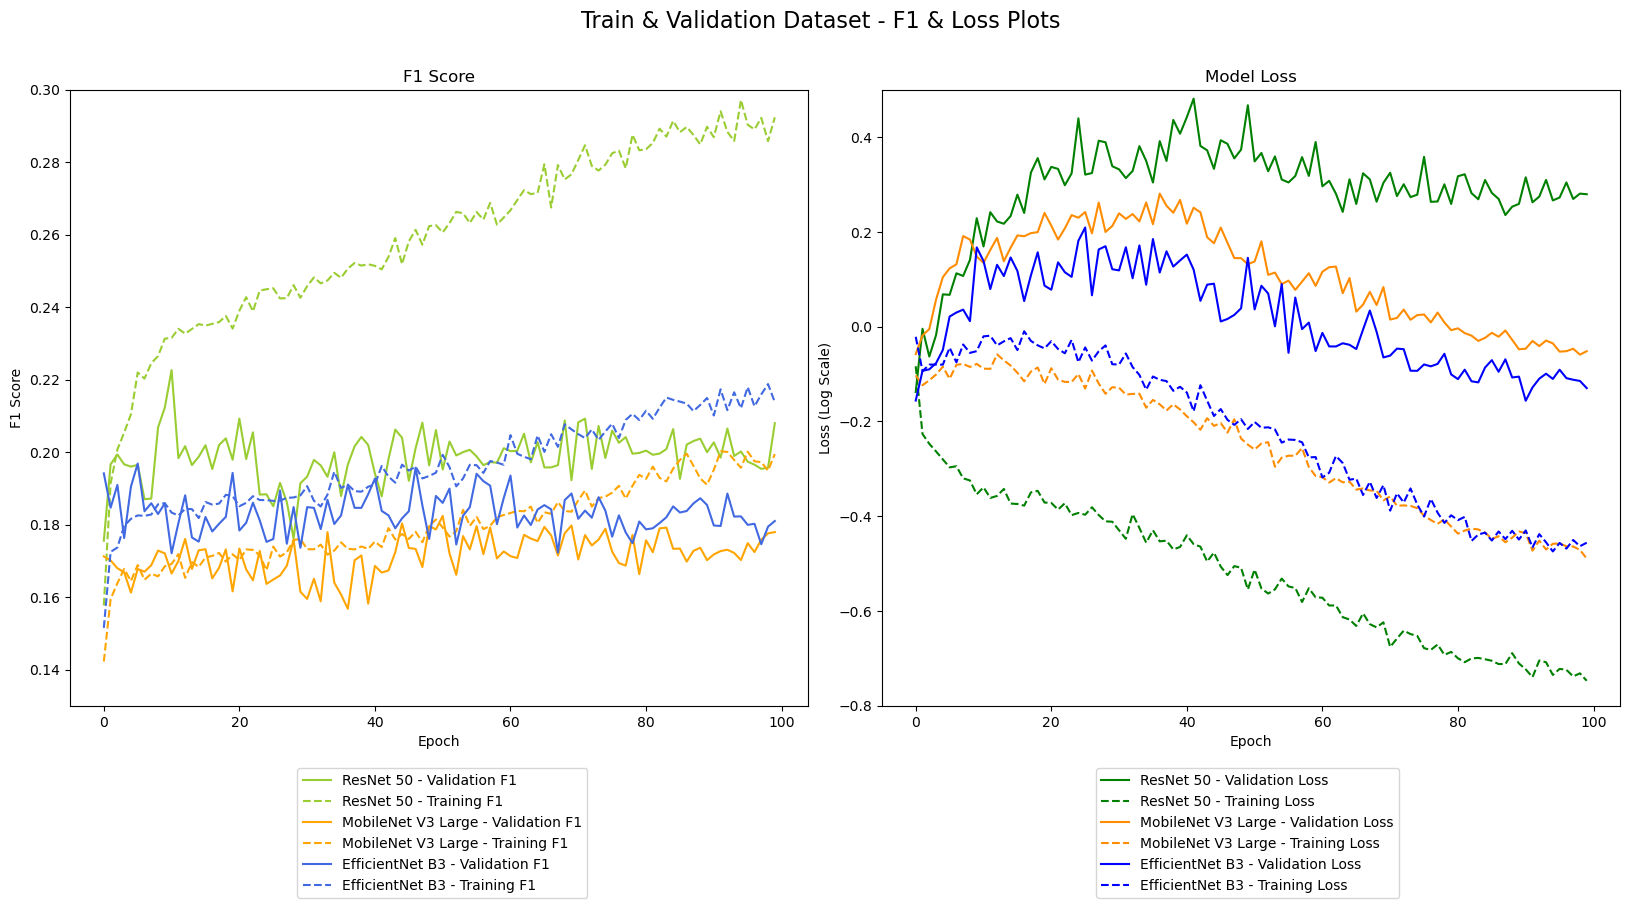

In [132]:
fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0.1)
ax_f1, ax_loss = gs.subplots()
ax_f1.set_title("F1 Score")
ax_f1.set_ylabel('F1 Score')
ax_loss.set_title("Model Loss")
ax_loss.set_ylabel('Loss (Log Scale)')

ax_f1.set_xlabel('Epoch')
ax_loss.set_xlabel('Epoch')

fig.suptitle(f'Train & Validation Dataset - F1 & Loss Plots', fontsize=16)
epochs = [i for i in range(int(num_epochs))]
for model in model_name:
    
    ax_f1.plot(epochs, 
                [f1_score(true, pred, average='macro') for true, pred in zip(model_params['ads']['val_true'][model], model_params['ads']['val_pred'][model])],
                label=f'{model_names[model]} - Validation F1', 
                color=colors_acc[model])
    ax_f1.plot(epochs, 
                [f1_score(true, pred, average='macro') for true, pred in zip(model_params['ads']['train_true'][model], model_params['ads']['train_pred'][model])],
                label=f'{model_names[model]} - Training F1', 
                color=colors_acc[model], linestyle='--')

    ax_loss.plot(epochs, 
                np.log(model_params["ads"]['val_loss'][model]),
                label=f'{model_names[model]} - Validation Loss', 
                color=colors_loss[model])
    ax_loss.plot(epochs, 
                np.log(model_params["ads"]['train_loss'][model]),
                label=f'{model_names[model]} - Training Loss', 
                color=colors_loss[model], linestyle='--')

ax_f1.tick_params(axis='y', labelcolor='black')   
ax_f1.set_ylim([0.13, 0.3])
ax_loss.set_ylim([-0.8, 0.5])
ax_loss.tick_params(axis='y', labelcolor='black')    
    
ax_f1.legend(bbox_to_anchor=(0.3, -1.03, 0.41, 0.94))
ax_loss.legend(bbox_to_anchor=(0.3, -1.03, 0.41, 0.94))

fig.tight_layout()
fig.savefig("metrics.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)

## Confusion Matrix

In [122]:
prediction_labels = ['Active',
 'Alert',
 'Amazed',
 'Amused',
 'Calm',
 'Cheerful',
 'Confident',
 'Conscious',
 'Creative',
 'Eager',
 'Educated',
 'Emotional',
 'Fashionable',
 'Feminine',
 'Inspired',
 'Loving',
 'Manly',
 'Persuaded',
 'Thrifty',
 'Youthful']

In [58]:
import seaborn as sns

### Efficient Net

In [126]:
with open(f'../models/eval_metrics_augmented_{"efficient_net_b3"}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
    eval_metrics = pickle.load(handle)

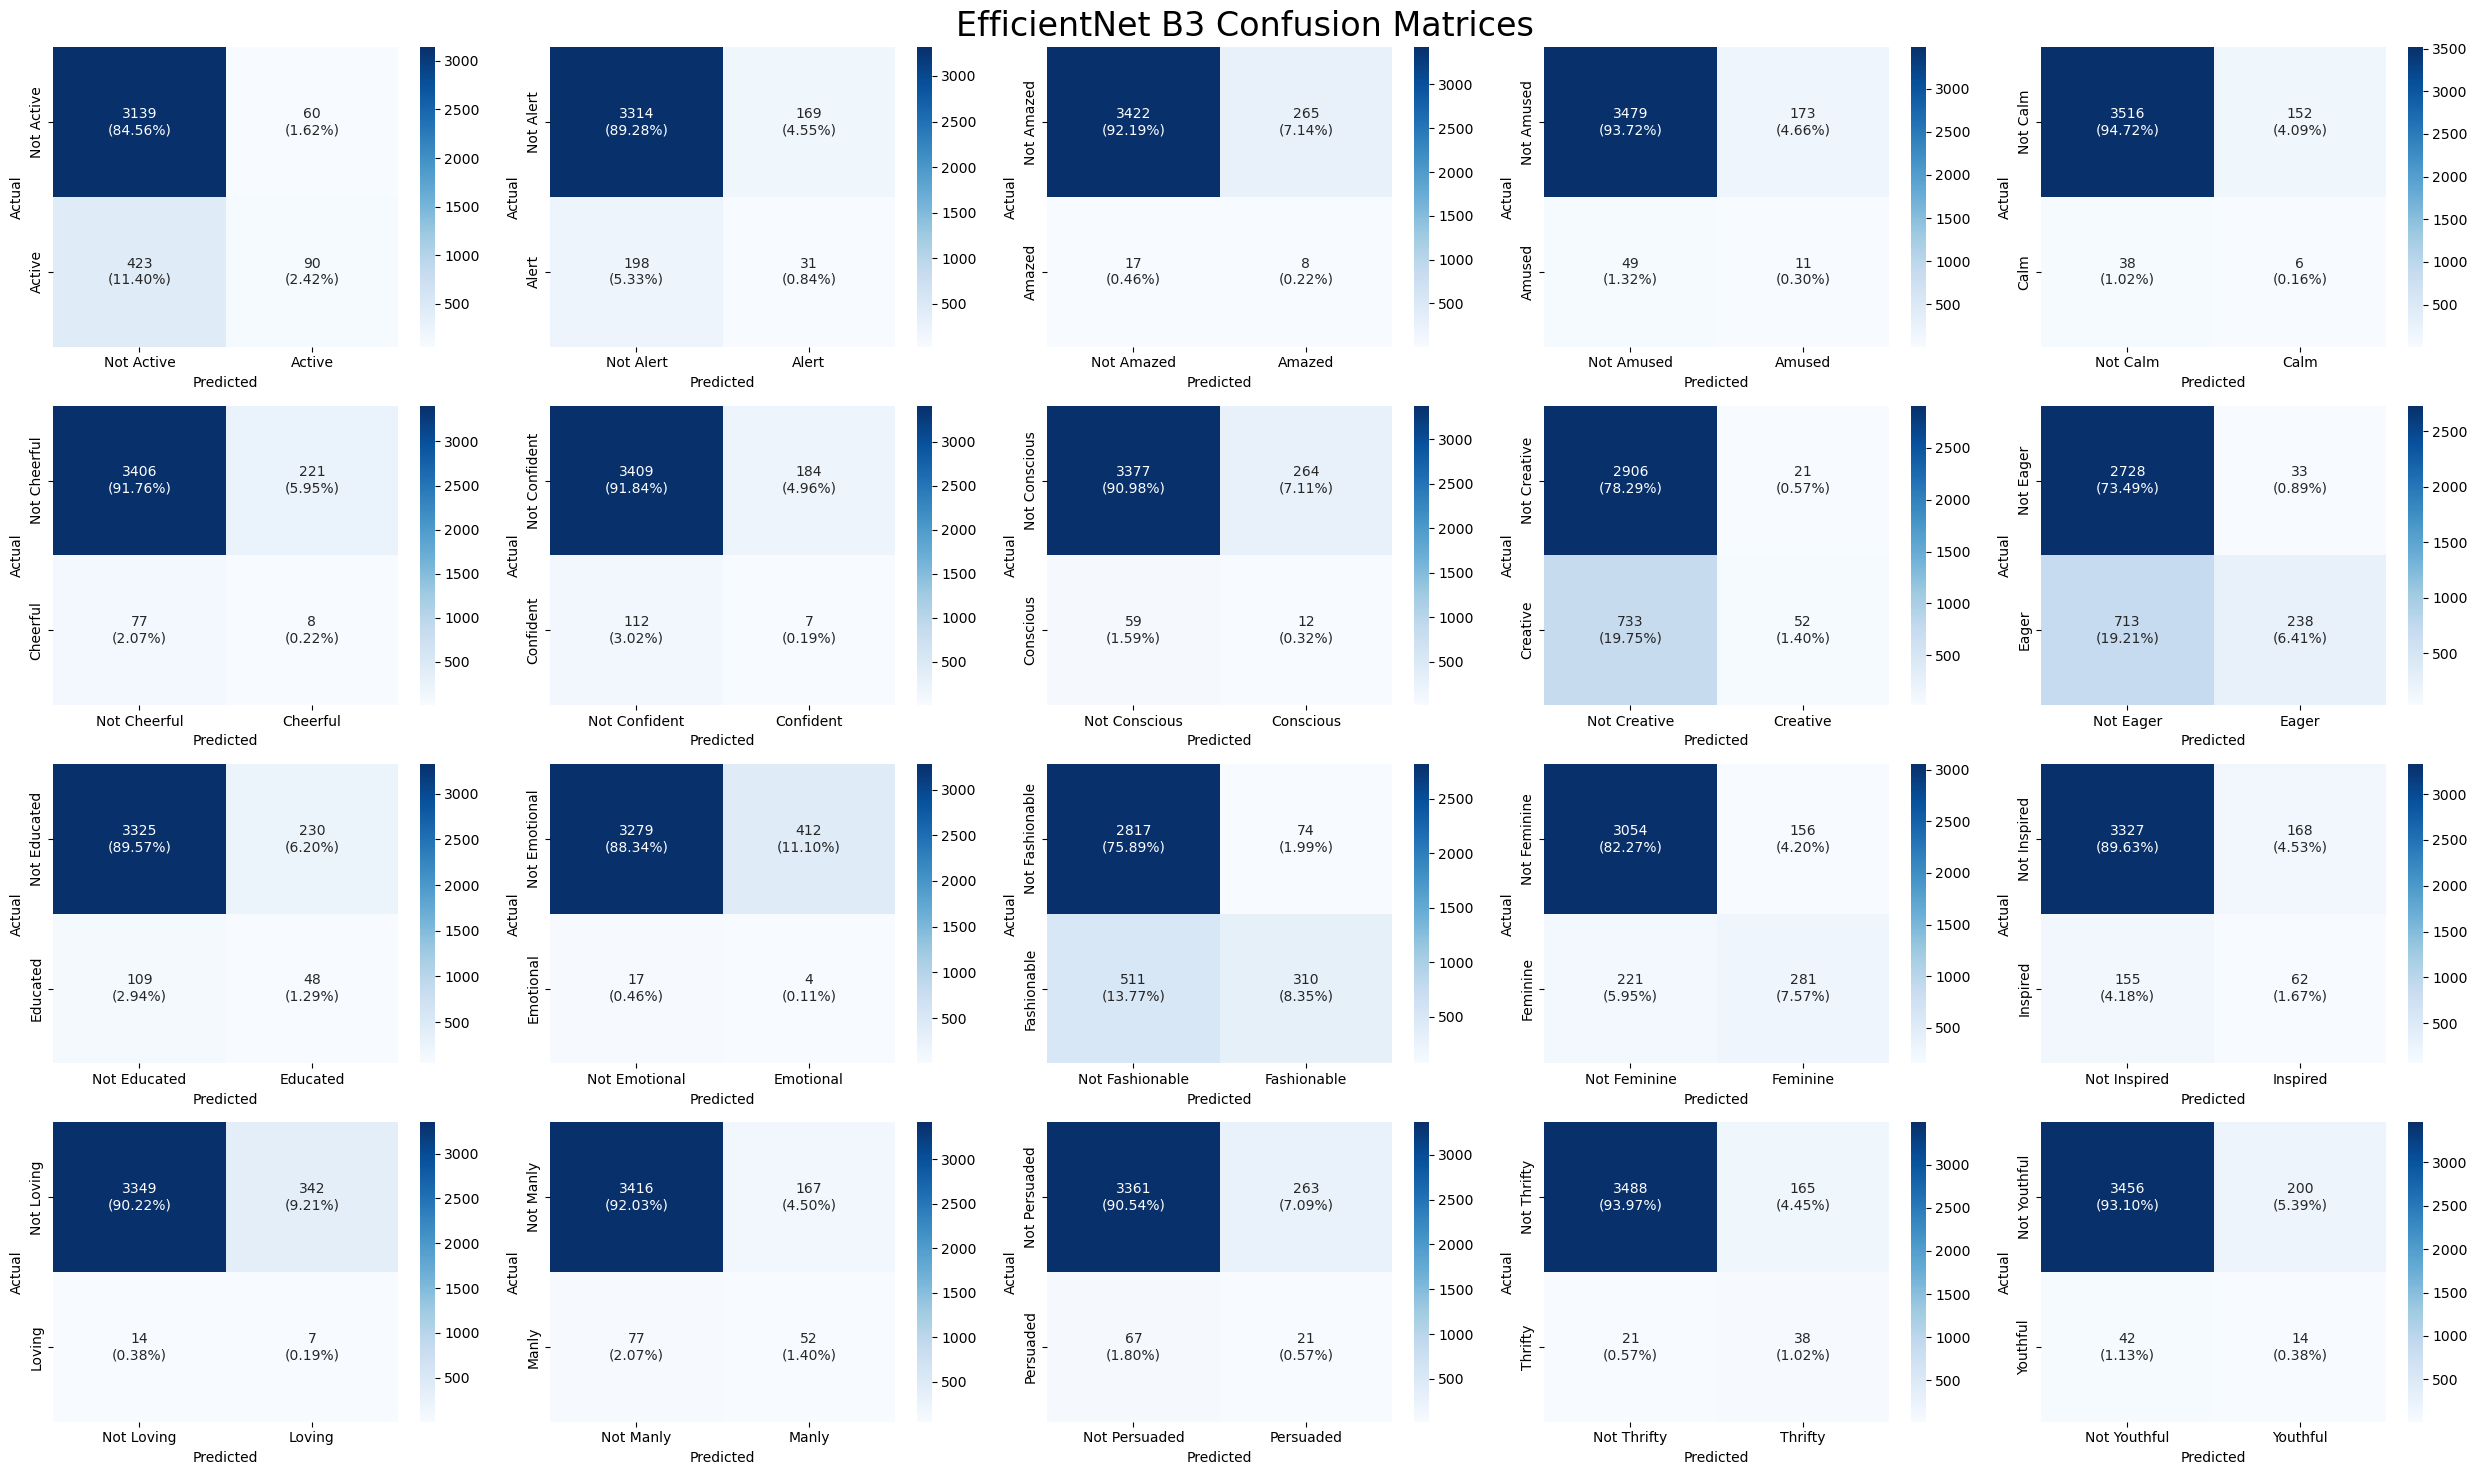

In [127]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(25, 15))
fig.suptitle(f'EfficientNet B3 Confusion Matrices', fontsize=24)
for idx, label in enumerate(prediction_labels):
    cm_matrix = eval_metrics['cm'][idx]
    group_counts = [f"{value:0.0f}" for value in cm_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm_matrix.flatten()/np.sum(cm_matrix)]
    categories = [f"Not {label}", f"{label}"]
    labels = [f"{c}\n({p})" for c, p in
                zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm_matrix, annot=labels, 
                xticklabels = categories, 
                yticklabels = categories,
                fmt='', cmap='Blues',
                ax=ax[math.floor(idx/5), int(idx%5)])
    ax[math.floor(idx/5), int(idx%5)].set_ylabel("Actual")
    ax[math.floor(idx/5), int(idx%5)].set_xlabel("Predicted")
fig.tight_layout()
fig.savefig("efficientnet_cm.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)

### Mobile Net

In [128]:
with open(f'../models/eval_metrics_augmented_{"mobile_net_v3_large"}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
    eval_metrics = pickle.load(handle)

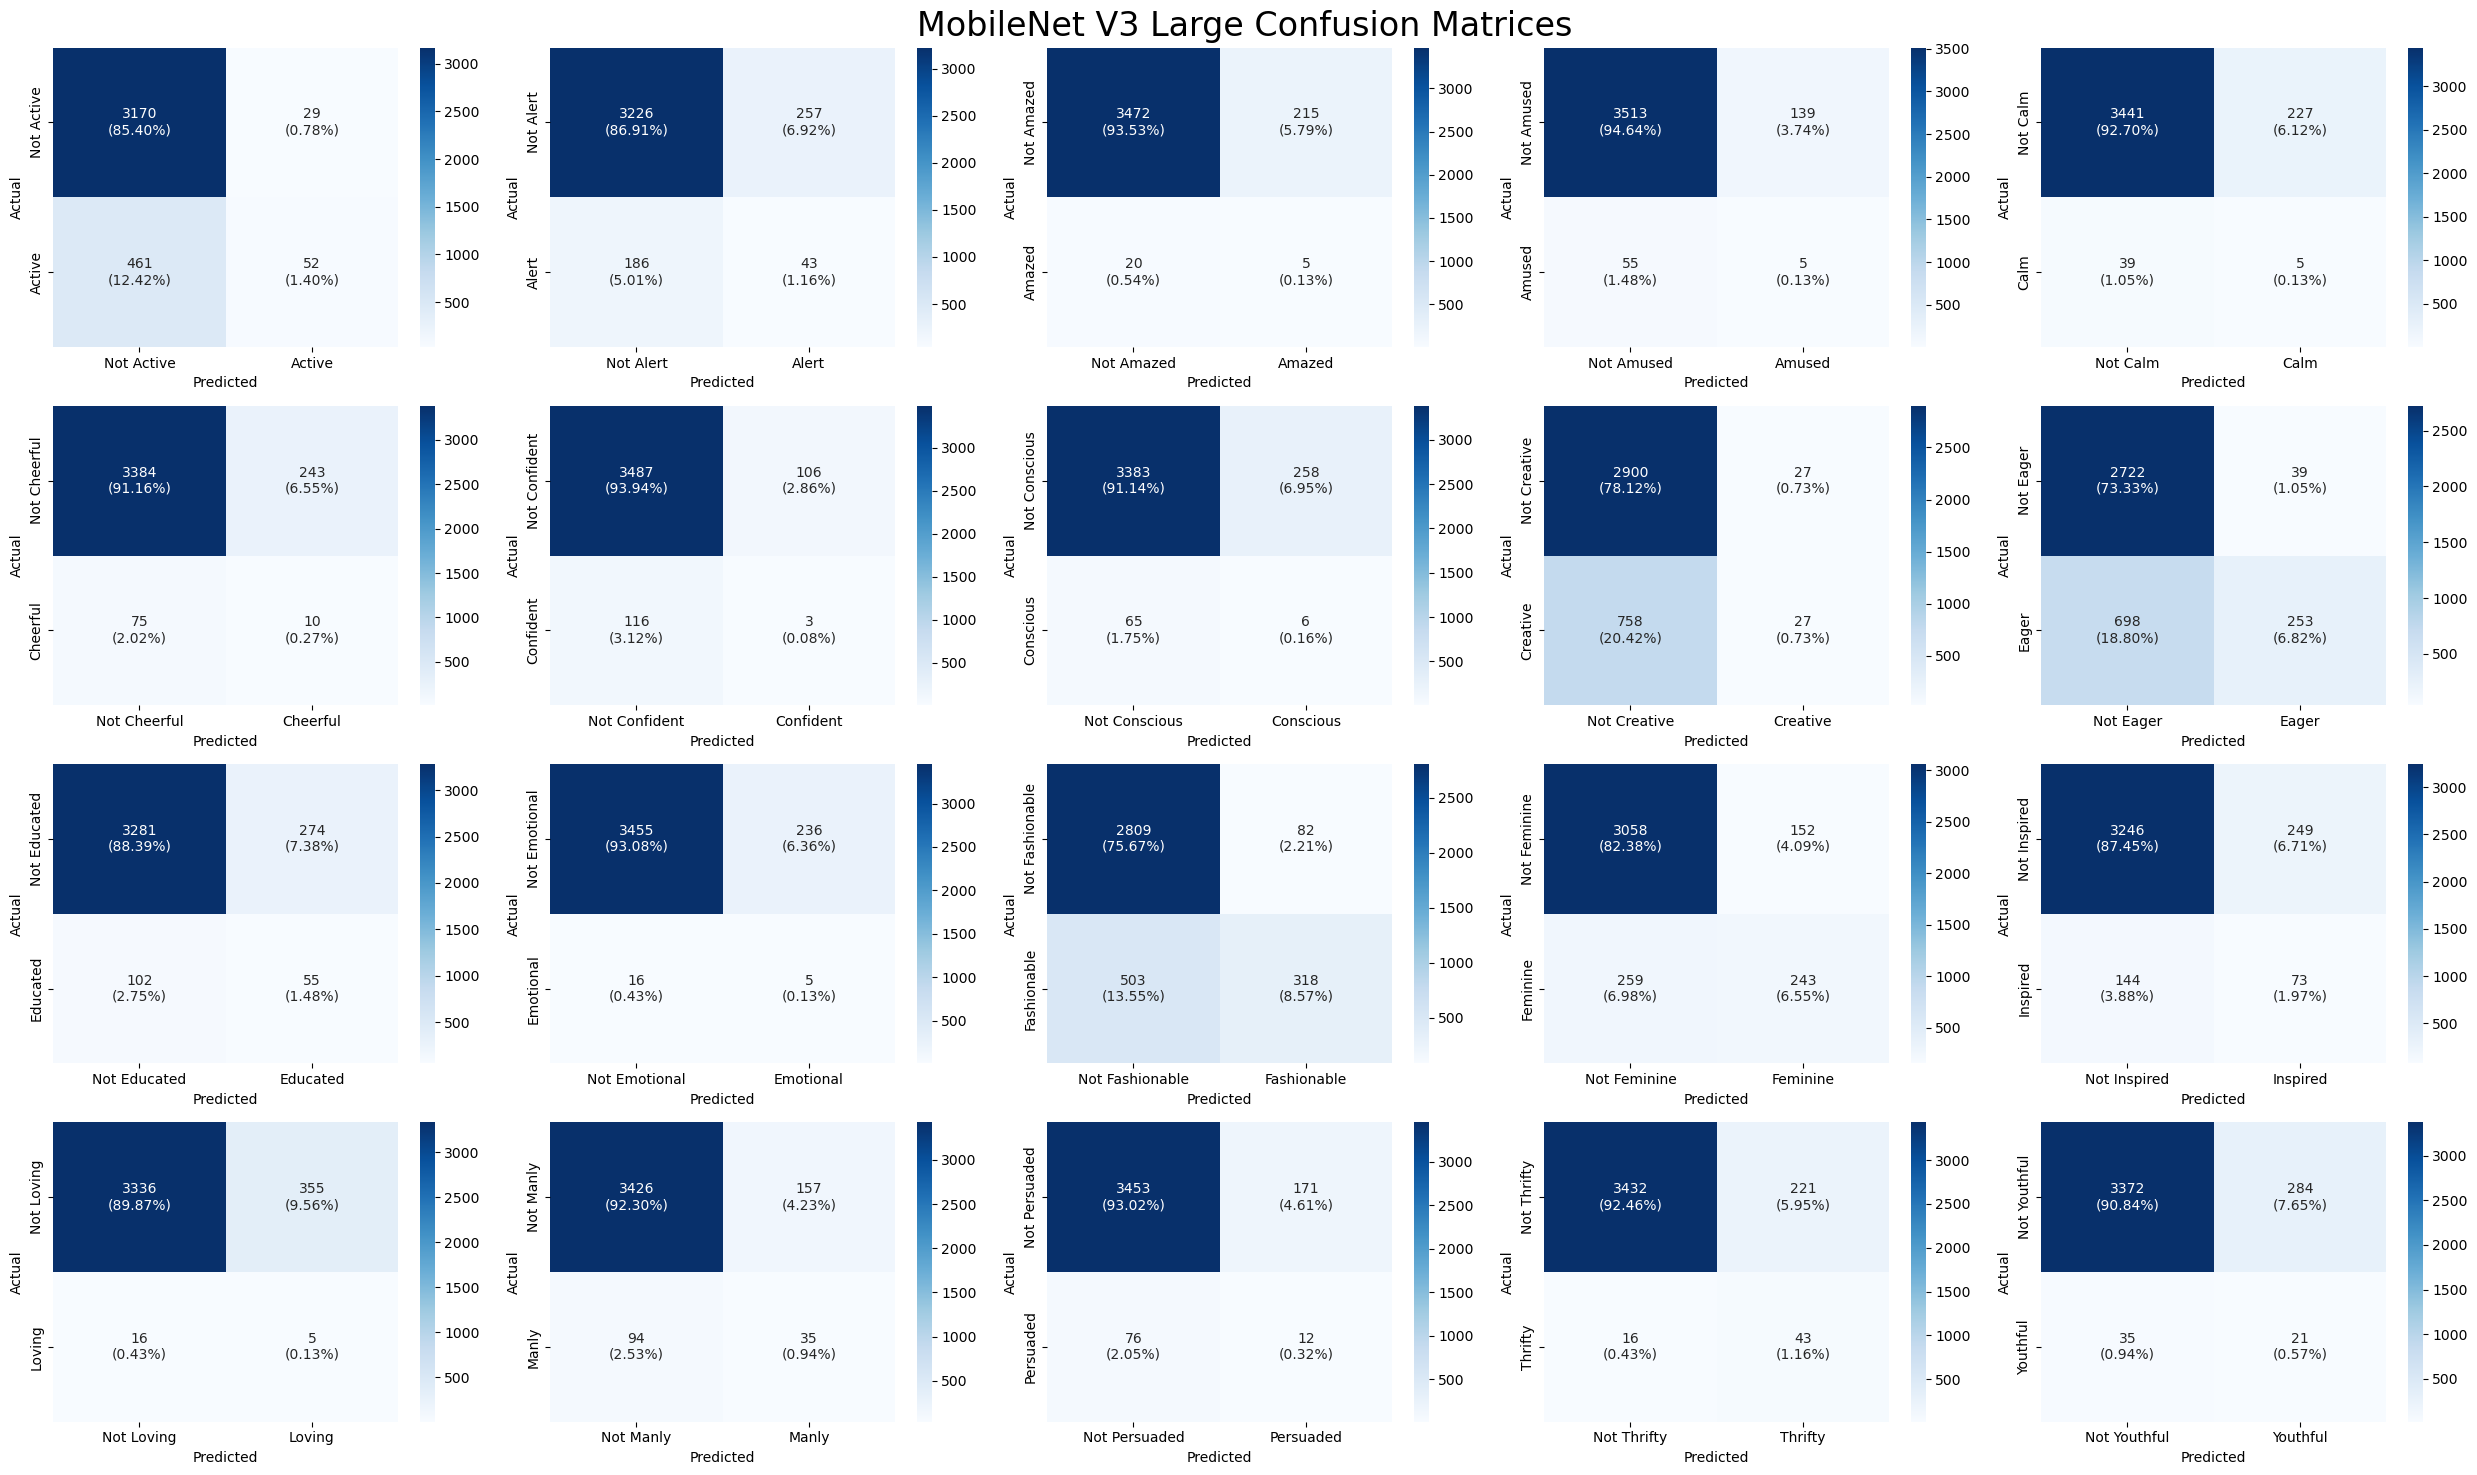

In [129]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(25, 15))
fig.suptitle(f'MobileNet V3 Large Confusion Matrices', fontsize=24)
for idx, label in enumerate(prediction_labels):
    cm_matrix = eval_metrics['cm'][idx]
    group_counts = [f"{value:0.0f}" for value in cm_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm_matrix.flatten()/np.sum(cm_matrix)]
    categories = [f"Not {label}", f"{label}"]
    labels = [f"{c}\n({p})" for c, p in
                zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm_matrix, annot=labels, 
                xticklabels = categories, 
                yticklabels = categories,
                fmt='', cmap='Blues',
                ax=ax[math.floor(idx/5), int(idx%5)])
    ax[math.floor(idx/5), int(idx%5)].set_ylabel("Actual")
    ax[math.floor(idx/5), int(idx%5)].set_xlabel("Predicted")
fig.tight_layout()
fig.savefig("mobilenet_cm.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)

### Resnet Net

In [130]:
with open(f'../models/eval_metrics_augmented_{"resnet50"}_{dataset_name}_{num_epochs}_{batch_size}_{lr_start}_{lr_end}_.pickle', 'rb') as handle:
    eval_metrics = pickle.load(handle)

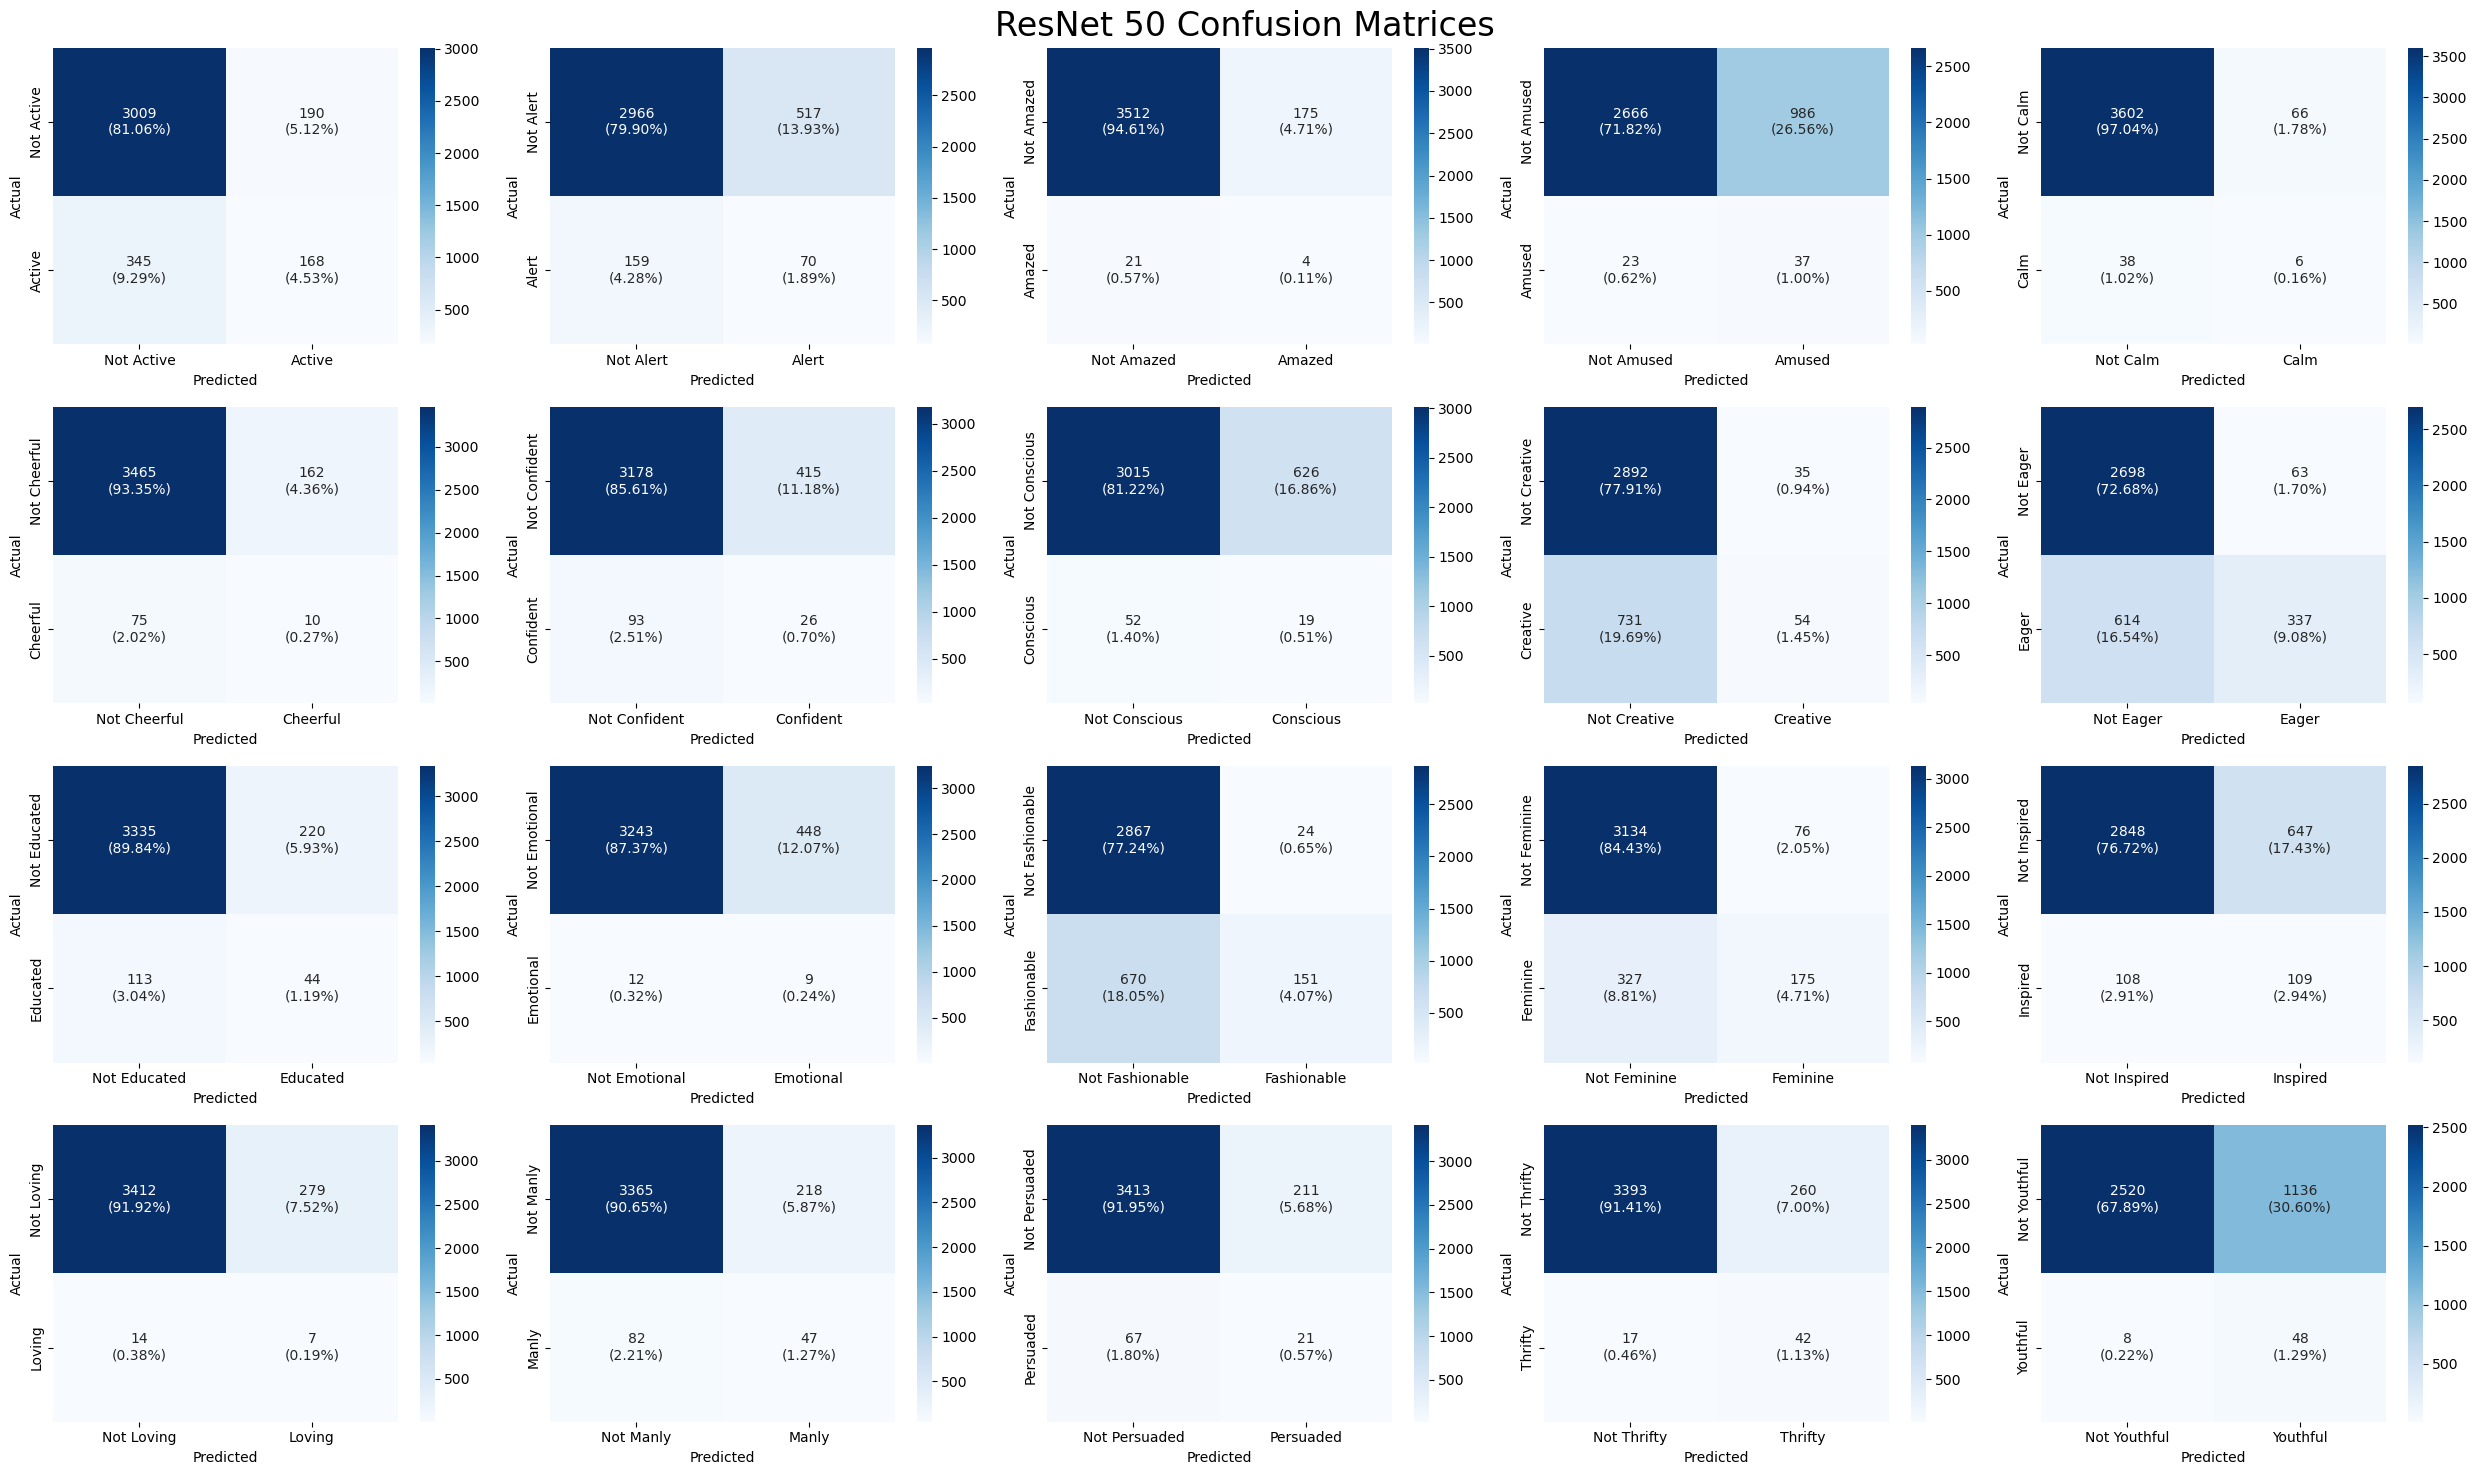

In [131]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(25, 15))
fig.suptitle(f'ResNet 50 Confusion Matrices', fontsize=24)
for idx, label in enumerate(prediction_labels):
    cm_matrix = eval_metrics['cm'][idx]
    group_counts = [f"{value:0.0f}" for value in cm_matrix.flatten()]
    group_percentages = [f"{value:.2%}" for value in cm_matrix.flatten()/np.sum(cm_matrix)]
    categories = [f"Not {label}", f"{label}"]
    labels = [f"{c}\n({p})" for c, p in
                zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm_matrix, annot=labels, 
                xticklabels = categories, 
                yticklabels = categories,
                fmt='', cmap='Blues',
                ax=ax[math.floor(idx/5), int(idx%5)])
    ax[math.floor(idx/5), int(idx%5)].set_ylabel("Actual")
    ax[math.floor(idx/5), int(idx%5)].set_xlabel("Predicted")
fig.tight_layout()
fig.savefig("resnet50_cm.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)